# Tensorflow 1

## MNIST with one-hot encoding

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [ ]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape

In [ ]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
y_train.shape

In [ ]:
y_train = y_train.reshape(-1,10,1)
y_test = y_test.reshape(-1,10,1)

In [ ]:
# Create a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])
model.predict(x_test[100:101])

In [ ]:
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.MSE)

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=512, validation_split=0.1)

In [ ]:
i = random.randint(0,x_test.shape[0])
print(np.round(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis=1)
y_test_pred = y_test.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_pred,y_pred)

In [ ]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);

## MNIST with sparse encoding

In [84]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
import numpy as np

In [85]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [87]:
# Reshape and normalize data
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32') / 255.0

In [91]:
y_train[100]

np.uint8(5)

In [89]:
# Create a simple model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28,28,)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])
model.predict(x_test[100:101])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.49835962, 0.61073935, 0.5883535 , 0.42355967, 0.6177154 ,
        0.35479707, 0.5545836 , 0.3928785 , 0.50490093, 0.6121017 ]],
      dtype=float32)

In [93]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy)

# Train the model
history = model.fit(x_train, y_train, epochs=25, batch_size=512, validation_split=0.1)

Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0335 - val_loss: 0.2501
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2824 - val_loss: 0.1904
Epoch 3/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2159 - val_loss: 0.1533
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1791 - val_loss: 0.1372
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1500 - val_loss: 0.1201
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1329 - val_loss: 0.1108
Epoch 7/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1148 - val_loss: 0.1032
Epoch 8/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0996 - val_loss: 0.0978
Epoch 9/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0861 - val_loss: 0.0955
Epoch 10/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0826 - val_loss: 0.0918
Epoch 11/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0706 - val_loss: 0.0886
Epoch 12/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
4 4


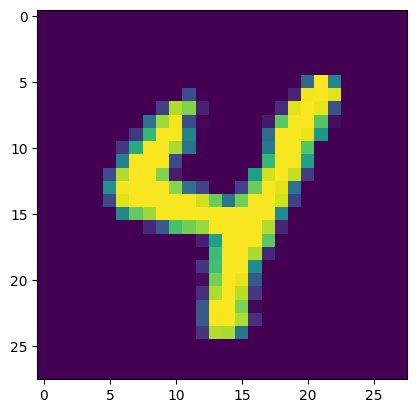

In [95]:
i = random.randint(0,x_test.shape[0])
print(np.argmax(model.predict(x_test[i:i+1])), y_test[i].T)
plt.imshow(x_test[i]);

In [96]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0850


0.07495542615652084

In [104]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9788

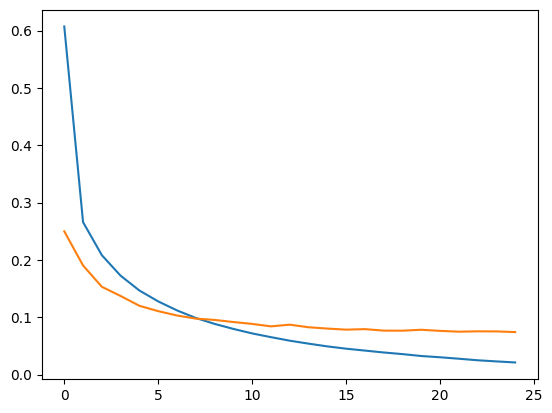

In [106]:
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);